In [56]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [39]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [41]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
df_train.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Cabin has lot of missing values

<AxesSubplot:xlabel='Sex'>

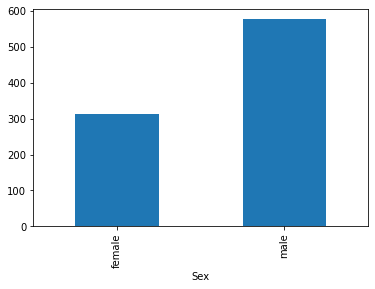

In [43]:
df_train.groupby(['Sex'])['PassengerId'].count().plot.bar()

In [44]:
df_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [45]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [46]:
#Dropping Cabin column
df1_train = df_train.drop(columns = ['Cabin'])
df1_test = df_test.drop(columns = ['Cabin'])
df1_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [47]:
#replacing Age Missing values with Median
df1_train['Age'] = df1_train['Age'].fillna(df1_train['Age'].median())
df1_test['Age'] = df1_test['Age'].fillna(df1_test['Age'].median())
df1_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [48]:
df1_train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [49]:
#replacing Embarked with most frequent
imputer = SimpleImputer(strategy='most_frequent',missing_values= np.nan)
imputer = imputer.fit(df1_train[['Embarked']])
df1_train[['Embarked']] = imputer.transform(df1_train[['Embarked']])
df1_train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [50]:
imputer = SimpleImputer(strategy='most_frequent',missing_values= np.nan)
imputer = imputer.fit(df1_test[['Embarked']])
df1_test[['Embarked']] = imputer.transform(df1_test[['Embarked']])
df1_test.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

In [51]:
#Creating Sex and Embarked as categorical
df1_train['Sex'] = pd.Categorical(df1_train['Sex']).codes
df1_train['Embarked'] = pd.Categorical(df1_train['Embarked']).codes
df1_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [52]:
df1_test['Sex'] = pd.Categorical(df1_test['Sex']).codes
df1_test['Embarked'] = pd.Categorical(df1_test['Embarked']).codes
df1_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2


In [60]:
df1_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
#spliting training data
predictors=["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
y = df1_train['Survived']
X = df1_train[predictors]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

Logistic Regression


In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0).fit(X_train,y_train)
print('train accuracy:',lr.score(X_train,y_train))
print('test accuracy:',lr.score(X_test,y_test))

train accuracy: 0.8098802395209581
test accuracy: 0.7937219730941704


## Bagging

In [65]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
clf_log = LogisticRegression()
clf_bag = BaggingClassifier(base_estimator=clf_log,random_state=1,n_estimators=400,max_samples=0.75,max_features=0.85).fit(X_train,y_train)


print('train accuracy =',clf_bag.score(X_train,y_train))
print('test accuracy =',clf_bag.score(X_test,y_test))

train accuracy = 0.8143712574850299
test accuracy = 0.7892376681614349


In [66]:
clf_bag1 = BaggingClassifier(random_state=1,n_estimators=400,max_samples=0.75,max_features=0.85).fit(X_train,y_train)
print('train accuracy =',clf_bag1.score(X_train,y_train))
print('test accuracy =',clf_bag1.score(X_test,y_test))

train accuracy = 0.9625748502994012
test accuracy = 0.7847533632286996


In [67]:
clf_bag2 = BaggingClassifier(base_estimator=SVC(),random_state=1,n_estimators=400,max_samples=0.75,max_features=0.85).fit(X_train,y_train)
print('train accuracy =',clf_bag2.score(X_train,y_train))
print('test accuracy =',clf_bag2.score(X_test,y_test))

train accuracy = 0.688622754491018
test accuracy = 0.6098654708520179


## Decision Trees

In [68]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=1).fit(X_train,y_train)
print('train accuracy =',clf_dt.score(X_train,y_train))
print('test accuracy =',clf_dt.score(X_test,y_test))

train accuracy = 0.9895209580838323
test accuracy = 0.7623318385650224


## Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=1,n_estimators = 20).fit(X_train,y_train)
print('train accuracy =',clf_rf.score(X_train,y_train))
print('test accuracy =',clf_rf.score(X_test,y_test))

train accuracy = 0.9790419161676647
test accuracy = 0.7937219730941704


Text(0.5, 0, 'No. of trees')

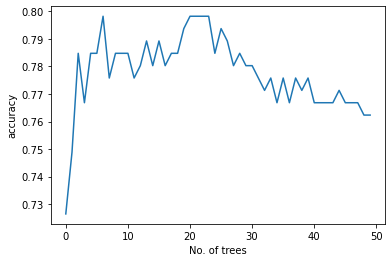

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt

trees = range(50)
accuracy = np.zeros(50)
for i in range(len(trees)):
    clf_rf = RandomForestClassifier(random_state=1,n_estimators = i + 1).fit(X_train,y_train)
    accuracy[i] = clf_rf.score(X_test,y_test)
    
plt.plot(trees,accuracy)
plt.ylabel('accuracy')
plt.xlabel('No. of trees')

## Grid Search CV

In [71]:
from sklearn.model_selection import GridSearchCV
params = {'min_samples_leaf':list(range(1,5)),'min_samples_split':list(range(2,10,2)),
         'n_estimators':list(range(10,50,10))}
clf_rf2 = RandomForestClassifier(random_state=1)
clf_gs = GridSearchCV(clf_rf2,params,scoring='accuracy',cv=5).fit(X_train,y_train)

In [72]:
# print the best sore
clf_gs.best_score_

0.8368869936034115

In [73]:
# print the best parameters selected
clf_gs.best_params_

{'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 40}

Let'use these best parameters and check wether they achieve the above cv accuracy

In [74]:
clf_rf3 = RandomForestClassifier(random_state=1,n_estimators = 40,min_samples_leaf=4,min_samples_split=2).fit(X_train,y_train)
print('train accuracy =',clf_rf3.score(X_train,y_train))
print('test accuracy =',clf_rf3.score(X_test,y_test))

from sklearn.model_selection import cross_val_score
scores_rf3 = cross_val_score(clf_rf3,X_train,y_train,scoring='accuracy',cv=5)
print("coss validation accuracy=", scores_rf3.mean())

train accuracy = 0.8832335329341318
test accuracy = 0.7847533632286996
coss validation accuracy= 0.8368869936034115


As we can see, grid search allowed us to find the best model parameters to improve our accuracy. Let's see the most important features of this classifier.

In [75]:
imp_feature = pd.DataFrame(clf_rf3.feature_importances_,predictors,columns=['Importance'])
imp_feature.sort_values('Importance',ascending=False)

,Importance
Sex,0.387563
Fare,0.186284
Age,0.158775
Pclass,0.137083
SibSp,0.049830
Embarked,0.043636
Parch,0.036830


In [77]:
#Predict on test data
df1_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [79]:
df1_test.Fare.unique()

array([  7.8292,   7.    ,   9.6875,   8.6625,  12.2875,   9.225 ,
         7.6292,  29.    ,   7.2292,  24.15  ,   7.8958,  26.    ,
        82.2667,  61.175 ,  27.7208,  12.35  ,   7.225 ,   7.925 ,
        59.4   ,   3.1708,  31.6833,  61.3792, 262.375 ,  14.5   ,
        61.9792,  30.5   ,  21.6792,  31.5   ,  20.575 ,  23.45  ,
        57.75  ,   8.05  ,   9.5   ,  56.4958,  13.4167,  26.55  ,
         7.85  ,  13.    ,  52.5542,  29.7   ,   7.75  ,  76.2917,
        15.9   ,  60.    ,  15.0333,  23.    , 263.    ,  15.5792,
        29.125 ,   7.65  ,  16.1   ,  13.5   ,   7.725 ,  21.    ,
         7.8792,  42.4   ,  28.5375, 211.5   ,  25.7   ,  15.2458,
       221.7792,  10.7083,  14.4542,  13.9   ,   7.775 ,  52.    ,
         7.7958,  78.85  ,   7.8542,  55.4417,   8.5167,  22.525 ,
         7.8208,   8.7125,  15.0458,   7.7792,  31.6792,   7.2833,
         6.4375,  16.7   ,  75.2417,  15.75  ,   7.25  ,  23.25  ,
        28.5   ,  25.4667,  46.9   , 151.55  ,  18.    ,  51.8

In [80]:
df1_test['Fare'] = df1_test['Fare'].fillna(df1_test['Fare'].median())

In [81]:
df1_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [82]:
df_submit = df1_test.copy()
df1_test = df1_test[predictors]
submit_predictions = clf_rf3.predict(df1_test)

my_submission = pd.DataFrame({'PassengerId': df_submit.PassengerId, 'Survived': submit_predictions})

In [83]:
#Export data
my_submission.to_csv('submission.csv', index=False)